## **III. Khám phá dữ liệu và các câu hỏi**

### **1. Khám phá dữ liệu**

#### **a. Chuẩn bị dữ liệu**

**Thêm các thư viện cần thiết**

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec

**Đọc dữ liệu**

In [31]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,Price,Area,Bedrooms,Toilets,Published At,Developer,Street,District,Suggested Price,Million/m2,District Price,Street Price
0,7.50,85.0,4,6,2024-10-24,cá nhân/môi giới,1,bình chánh,107.1,88.24,4.500,15.25
1,23.00,230.0,5,6,2024-10-24,cá nhân/môi giới,1,bình chánh,107.1,100.00,4.500,15.25
2,4.99,52.0,3,2,2024-10-25,cá nhân/môi giới,1,bình tân,98.8,95.96,5.225,4.85
3,4.25,46.0,2,2,2024-10-28,cá nhân/môi giới,1,bình tân,98.8,92.39,5.225,4.85
4,4.85,67.0,3,2,2024-10-25,cá nhân/môi giới,1,bình tân,98.8,72.39,5.225,4.85


#### **b. Khám phá các dữ liệu tổng quan**

In [32]:
df.shape

(9327, 12)

In [33]:
df.describe()

,Price,Area,Bedrooms,Toilets,Suggested Price,Million/m2,District Price,Street Price
count,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000
mean,13.506486,102.191757,3.751689,3.652085,104.122104,126.160639,9.347336,11.266900
std,15.029124,63.206813,1.936835,2.040235,65.195127,115.112346,4.603128,10.069088
min,0.001050,7.000000,0.000000,0.000000,4.700000,0.010000,1.150000,0.001050
25%,4.150000,61.000000,2.000000,2.000000,59.327700,57.995000,6.500000,5.059120
50%,7.800000,83.000000,4.000000,3.000000,81.800000,97.670000,8.200000,7.450000
75%,16.400000,121.000000,4.000000,5.000000,132.000000,161.990000,11.500000,14.000000
max,86.000000,405.300000,12.000000,16.000000,687.200000,5320.000000,24.000000,85.000000


- **Nhận xét**:

    - Tổng quan dữ liệu dữ liệu bao gồm 9327 dòng dữ liệu liệu và 12 cột thuộc tính

    - Các thông số thống kê ở mức chấp nhận được so với thực tế 

    - Đặc biệt cột Price có std hơi cao với hơn 15.0, cho thấy sự biến động trọng mức giá ở các bất động sản ở HCM là cực kỳ cao, các BDS có sự phân hóa cao về giá.

#### **c. Các tìm hiểu về số lượng bất động sản**

##### **Biểu đồ thống kê số BDS theo khu vực Quận/Huyên**

**Chuẩn bị dữ liệu**

In [34]:
# Đếm số lượng BĐS trong mỗi quận
district_counts = df['District'].value_counts().reset_index()
district_counts.columns = ['District', 'Number of Properties']

# Xử lý để colormap
norm = plt.Normalize(min(district_counts["Number of Properties"]), max(district_counts["Number of Properties"])) # Chuaarn hoas duwx lieeuj
colors = list(cm.Blues(norm(district_counts["Number of Properties"])))  # Ánh xạ dữ liệu vào hệ màu Blues, palette không hỗ trợ numpy array
                                                                        # nên phải chuyển sang list
   

**Trực quan hóa dữ liệu**

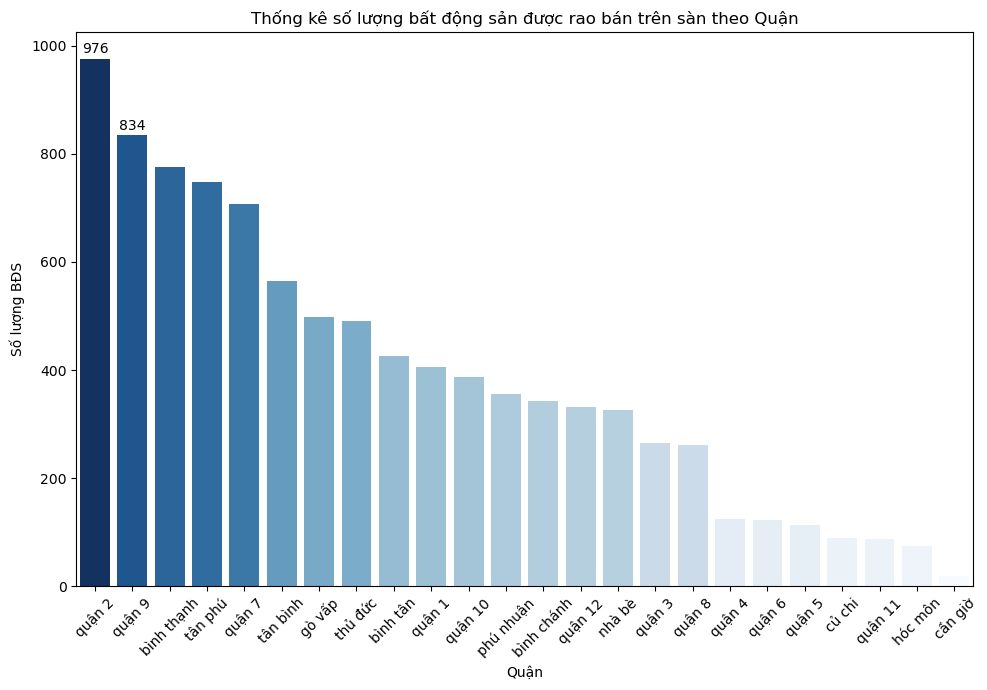

In [35]:
# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=district_counts, x='District', y='Number of Properties', palette=colors, hue='District', legend=False)

# Thêm số lên cột
for i, p in enumerate(ax.patches):
    if district_counts['Number of Properties'][i] >= 800:  # Điều kiện
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)
    
plt.title('Thống kê số lượng bất động sản được rao bán trên sàn theo Quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Nhận xét:**
- Dựa vào thống kê, chúng ta dễ dàng nhận ra các quận trung tâm như quận 2, 7, 9, Bình Thạnh là các các quận có thị trường bất động sản sôi nổi nhất khu vực thành phố Hồ Chí Minh khi có từ hơn 600 đến gần 1000 bất động sản được rao bán trong từng quận. 

- Mặt khác, các quận/huyện ngoài rìa như huyện Hóc Môn, Cần Giờ, Củ Chi, Quận 11 là các quận ảm đạm về thị trường bất động sản nhất khi chỉ có dưới 200 bất động sản được đang bán trong thời gian của dữ liệu đăng bán.

- Dễ dàng nhận thấy chính sách thành lập thành phố Thủ Đức trực thuộc thành phố Hồ Chí Minh mang lại những tín hiệu tích cực rõ rệt trên thị trường bất động sản khi cả 3 quận thành viên của thành phố Thủ Đức lần lượt đều đứng top đầu trong số các quận có nhiều bất động sản được đăng bán nhất, cụ thể:
    - Quận 2 với 976 BDS (top 1)
    - Quận 9 với 834 BDS (top 2)
    - Quận Thủ Đức với gần 600 BDS (top 8)

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

##### **Biểu đồ thống kê số BDS theo thời gian thực**


**Chuẩn bị dữ liệu**

In [36]:
# Đếm số lượng BĐS trong mỗi quận
date_counts = df['Published At'].value_counts().reset_index()
date_counts.columns = ['Published At', 'Number of Properties']

# Sắp xếp dữ liệu theo ngày
date_counts = date_counts.sort_values(by='Published At')


In [37]:
# Chuẩn bị dữ liệu cho biểu đồ sau 
# Danh sách các quận chính
main_districts = [
    "quận 1", "quận 2", "quận 7", "quận 9", 
    "bình thạnh", "thủ đức", 
    "tân bình", "tân phú"
]

# Danh sách quận thuộc khu vực Thủ Đức
thu_duc_districts = ["quận 2", "quận 9", "quận thủ đức"]

# Gộp nhóm các khu vực
df["Region"] = df["District"].apply(
    lambda x: "Thủ Đức" if x in thu_duc_districts else "TP.HCM"
)

# Gom nhóm theo "Ngày đăng" và "Nhóm quận", đếm số lượng tin bất động sản
grouped_data = df.groupby(["Published At", "Region"]).size().reset_index(name="Quanity")

# Pivot table để chuẩn bị dữ liệu
pivot_data = grouped_data.pivot(index="Published At", columns="Region", values="Quanity").fillna(0)

# Tính phần trăm trên mỗi hàng
percent_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

**Trực quan hóa**

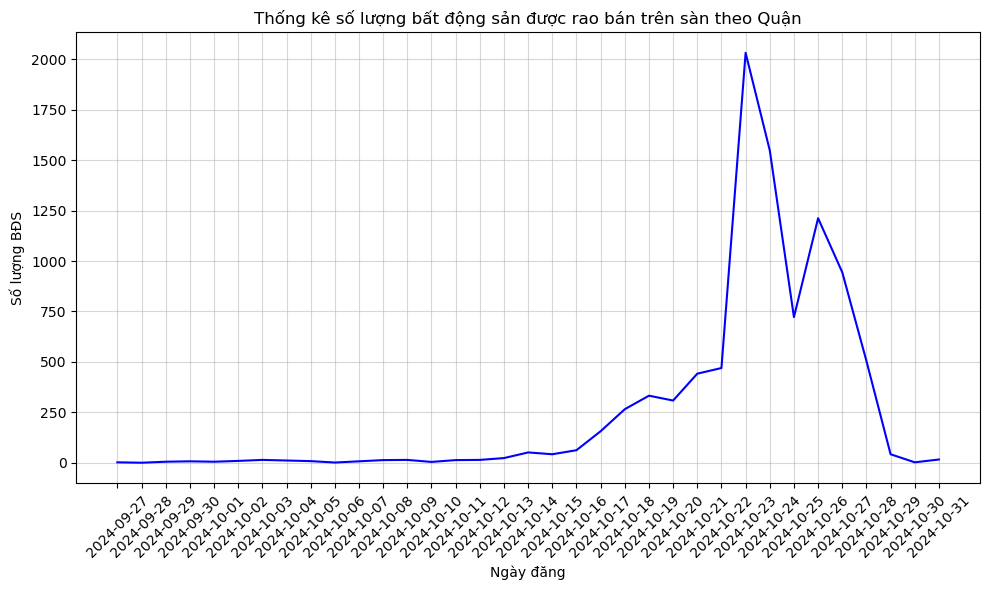

In [38]:
# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=date_counts, x='Published At', y='Number of Properties', color="blue")
plt.title('Thống kê số lượng bất động sản được rao bán trên sàn theo Quận')
plt.xlabel('Ngày đăng')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

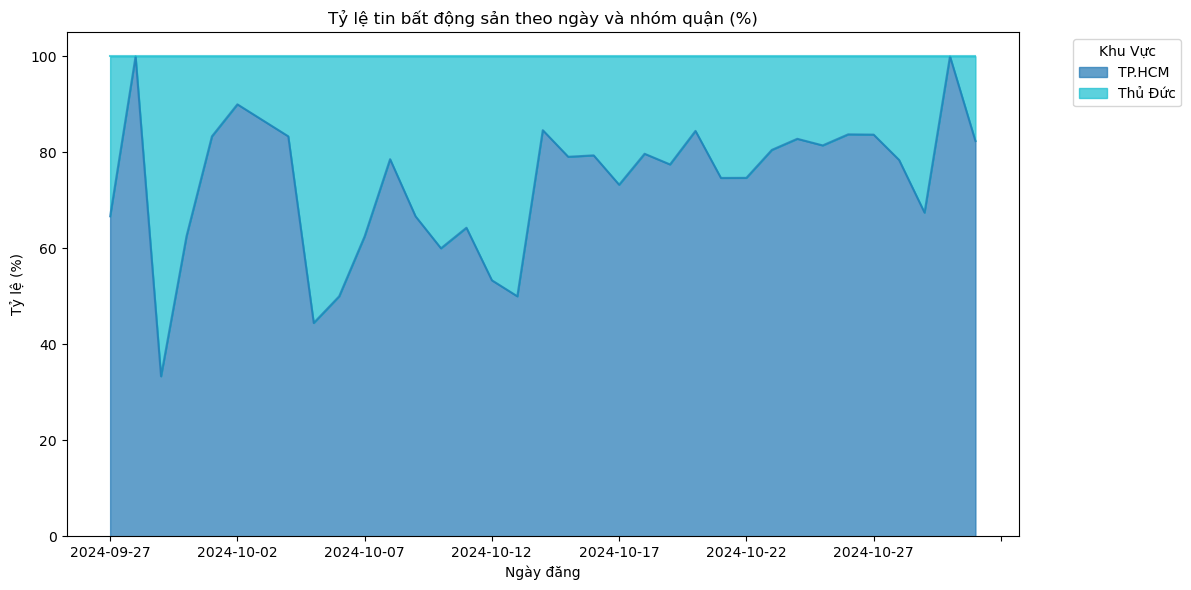

In [39]:
# Vẽ biểu đồ miền
plt.figure(figsize=(12, 6))
percent_data.plot(kind='area', stacked=True, alpha=0.7, figsize=(12, 6), cmap="tab10")
plt.title("Tỷ lệ tin bất động sản theo ngày và nhóm quận (%)")
plt.xlabel("Ngày đăng")
plt.ylabel("Tỷ lệ (%)")
plt.legend(title="Khu Vực", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét:**
- Số lượng bất động sản được rao bán trên sàn batdongsan.com ghi nhận một sự tăng trưởng đáng kể trong thời gian gần cuối năm.

- Khu vực thành phố Hồ Chí Minh ghi nhận một xu hướng tăng nhẹ về tổng số lượng tin bất động sản được đăng bán thời điểm cuối năm khi so với khu vực Thủ Đức

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

##### **Biểu đồ phân bổ số BDS theo khoảng giá**

**Chuẩn bị dữ liệu**

In [40]:
# Định nghĩa các khoảng giá và gắn nhãn
bins = [0, 2, 5, 10, 20, 50, 100, float('inf')]  # Các khoảng giá (tính bằng đồng)
labels = [
    "0 - 2 tỷ", "2 - 5 tỷ", "5 - 10 tỷ", "10 - 20 tỷ", 
    "20 - 50 tỷ", "50 - 100 tỷ", "Trên 100 tỷ"
]

# Phân loại giá trị
df["Price Range"] = pd.cut(df["Price"], bins=bins, labels=labels, right=False)

# Đếm số lượng bất động sản thuộc mỗi khoảng
price_distribution = df["Price Range"].value_counts(sort=False)

**Trực quan hóa**

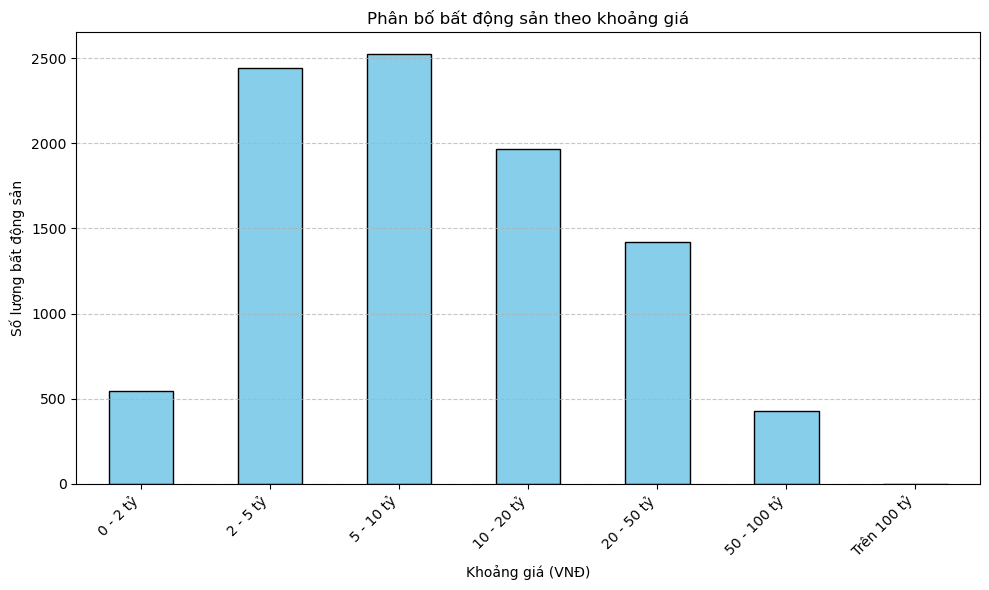

In [41]:


# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Phân bố bất động sản theo khoảng giá")
plt.xlabel("Khoảng giá (VNĐ)")
plt.ylabel("Số lượng bất động sản")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **d. Phân tích sự liên hệ giữa thuộc itnsh giá và diện tích**

**Chuẩn bị dữ liệu**

In [42]:
# Rút trích dữ liệu của một số quận để Visualization 
district_2 = df[df["District"] == "quận 2"]
district_7 = df[df["District"] == "quận 7"]
district_9 = df[df["District"] == "quận 9"]
district_BinhThanh = df[df["District"] == "bình thạnh"]


datasets = [district_2, district_7, district_9, district_BinhThanh]
district_names = ["Quận 2", "Quận 7", "Quận 9", "Bình Thạnh"]

**Trực quan hóa**

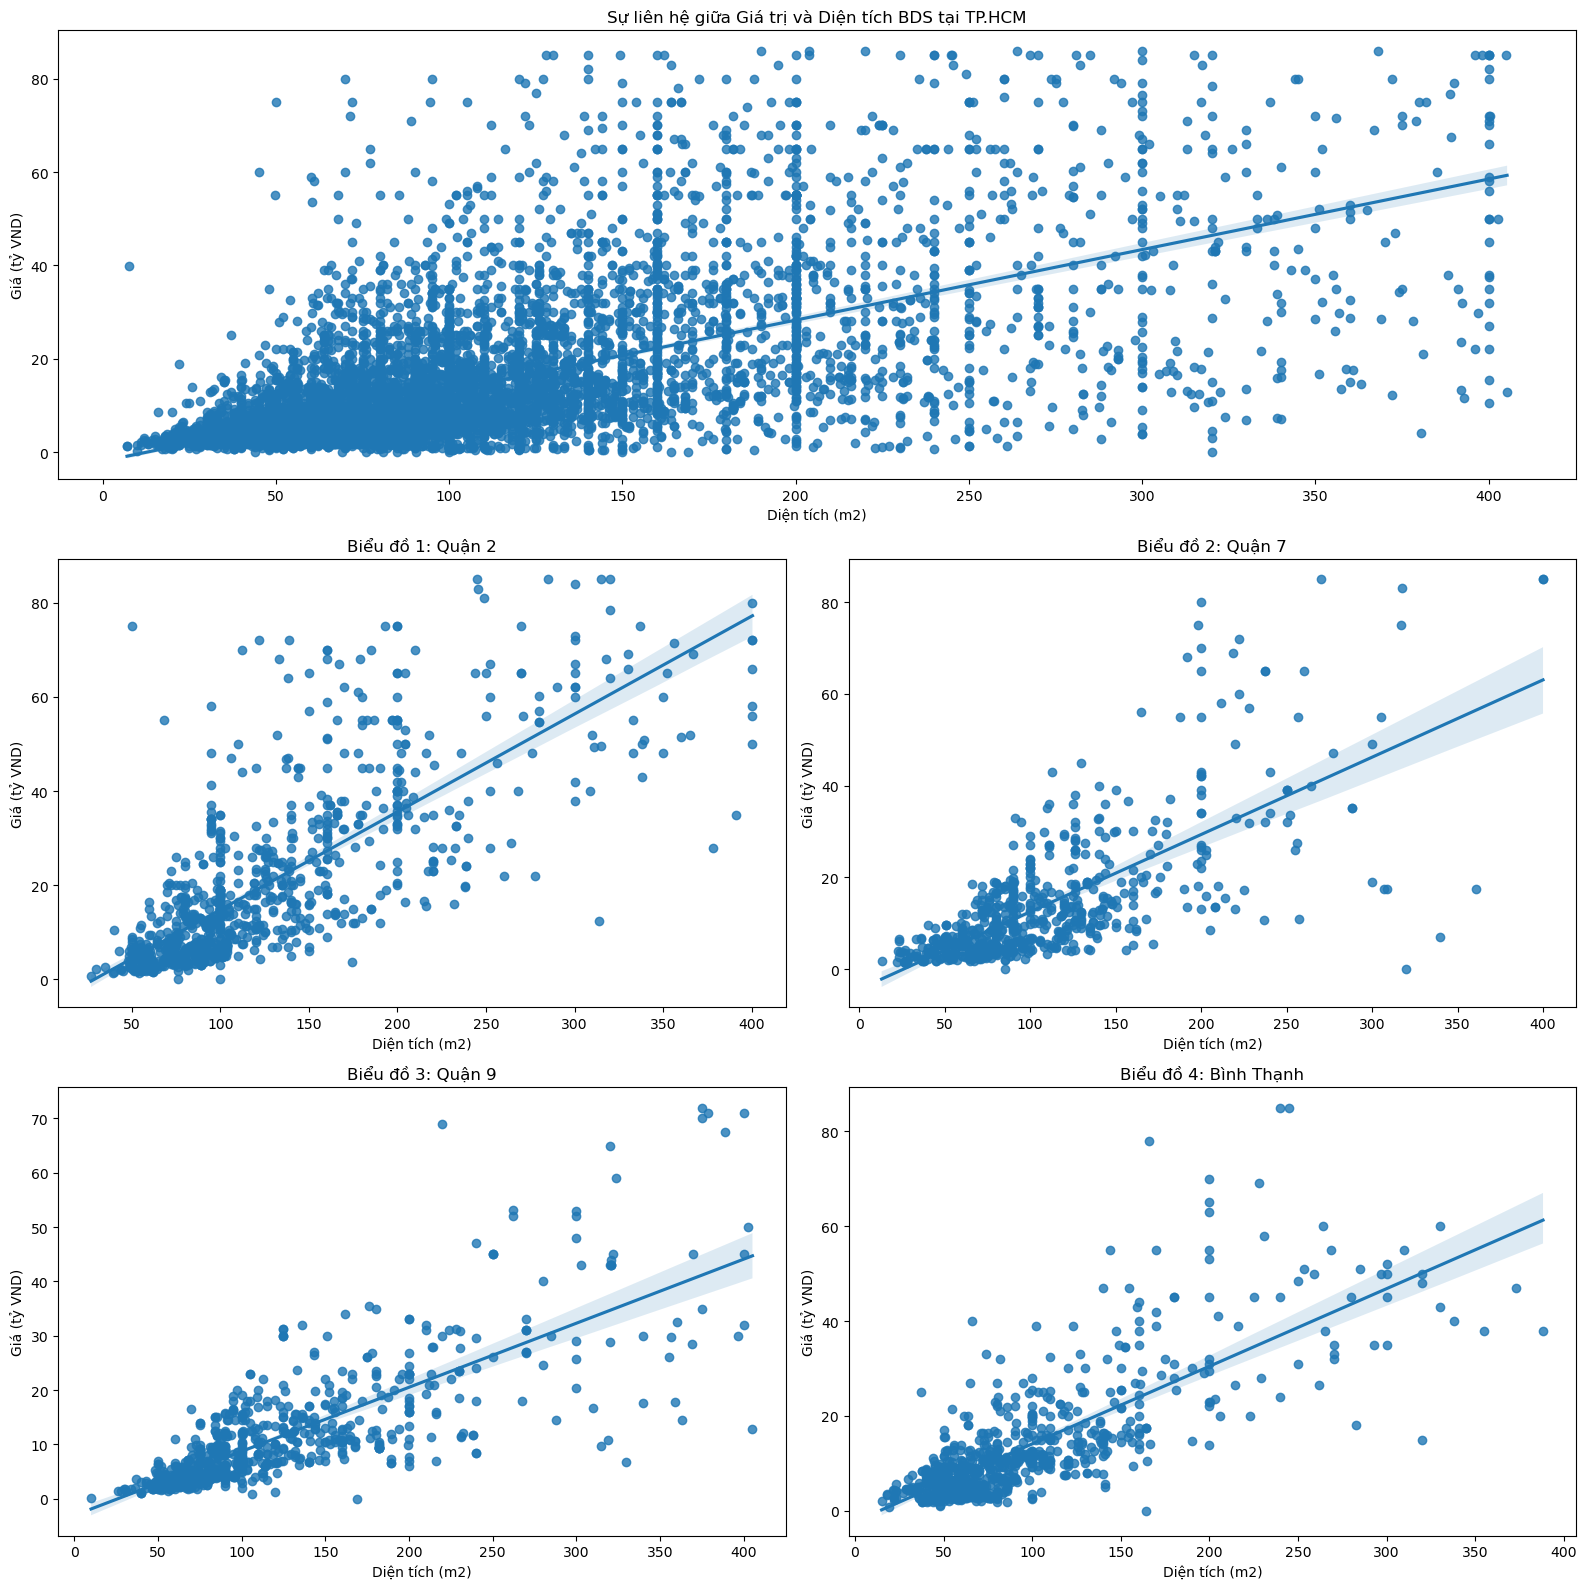

In [43]:
# Tạo GridSpec để quản lý bố cục
fig = plt.figure(figsize=(16, 16))
gs = GridSpec(3, 2, figure=fig)  # 3 hàng, 2 cột

# Biểu đồ tổng thể (ở dòng đầu tiên, chiếm cả hàng)
ax_total = fig.add_subplot(gs[0, :])  # Chiếm toàn bộ dòng đầu
sns.regplot(data=df, x="Area", y="Price", ax=ax_total)
ax_total.set_title('Sự liên hệ giữa Giá trị và Diện tích BDS tại TP.HCM')
ax_total.set_xlabel('Diện tích (m2)')
ax_total.set_ylabel('Giá (tỷ VND)')

# Biểu đồ cho từng quận (ở các dòng sau)
for i, (data, name) in enumerate(zip(datasets, district_names)):
    row, col = divmod(i, 2)  # Tính hàng và cột
    ax = fig.add_subplot(gs[row + 1, col])  # Bắt đầu từ dòng thứ 2
    sns.regplot(data=data, x="Area", y="Price", ax=ax)
    ax.set_title(f'Biểu đồ {i + 1}: {name}')
    ax.set_xlabel('Diện tích (m2)')
    ax.set_ylabel('Giá (tỷ VND)')

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()

**Nhận xét:**
- Nhìn chung thuộc tính giá và diện tích có một sự tương quan thuận khá yếu
    - Điều này cho thấy ngoài diện tích thì còn nhiều yếu tố khác có ảnh hưởng đến mức giá của BDS có thể nhắc đến như: vị trí, tiện ích đi kèm,...

- Mặc dù thế, các biểu đồ riêng lẻ từng quận lại có thấy sự tương quan khá cao

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

#### **e. Biểu đồ ma trận**

**Chuẩn bị dữ liệu**

In [44]:
matrix_data = df.select_dtypes(include="number").corr()


**Trực quan hóa**

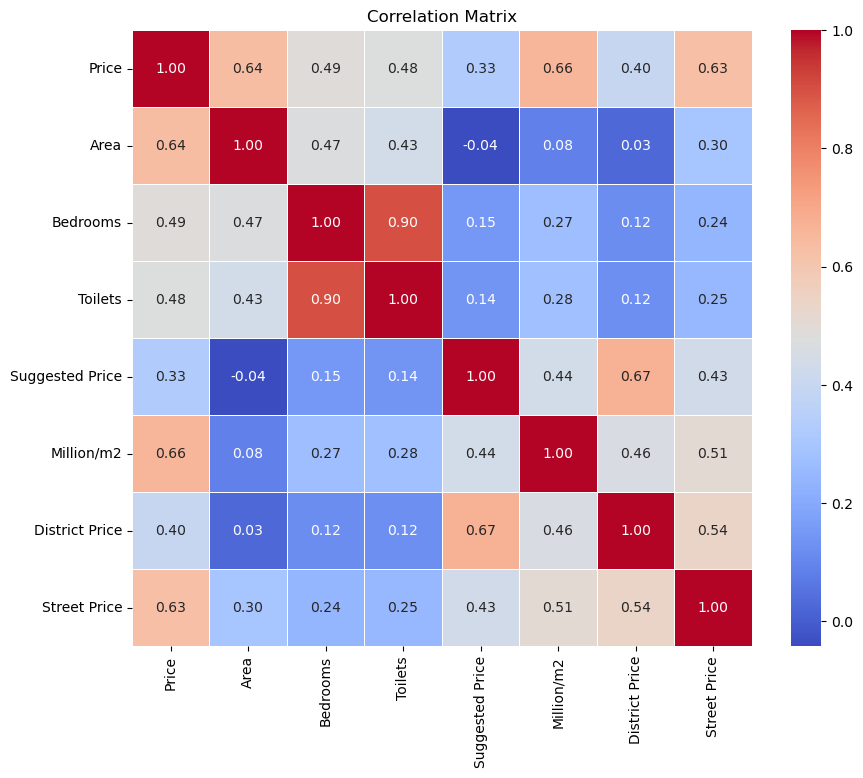

In [45]:
# Vẽ heatmap
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
sns.heatmap(matrix_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

**Nhận xét:**

- Các yếu tổ ảnh hưởng mạnh đến `Price` như: `Million/m2` (0.66), `Area` (0.64) và `Street Price` (0.63).

- Các yếu tổ ảnh hưởng trung bình đến `Price` như: `District Price` (0.4) và `Bedrooms` (0.49).

- Các yếu tố ảnh hưởng yếu đến `Price` như: `Suggested Price` (0.33).

#### **f. Các phân tích tổng hợp**

##### **Biểu đồ thống kê số BDS theo nhóm BDS kết hợp với giá BDS**


**Chuẩn bị dữ liệu**

In [46]:
# Xử lý dữ liệu trước khi vẽ biểu đồ 
# Tạo cột "Loại chủ đầu tư" để phân nhóm
df["Developer"] = df["Developer"].str.lower()
df["Type of Developer"] = df["Developer"].apply(
    lambda x: "công ty" if x != "cá nhân/môi giới" else "cá nhân/môi giới"
)


In [47]:

# 1. Tính phần trăm thị phần
market_share = df["Type of Developer"].value_counts(normalize=True) * 100

# 2. Tính giá trị trung bình và vẽ biểu đồ cột
avg_price = df.groupby("Type of Developer")["Price"].mean()

**Trực quan hóa**

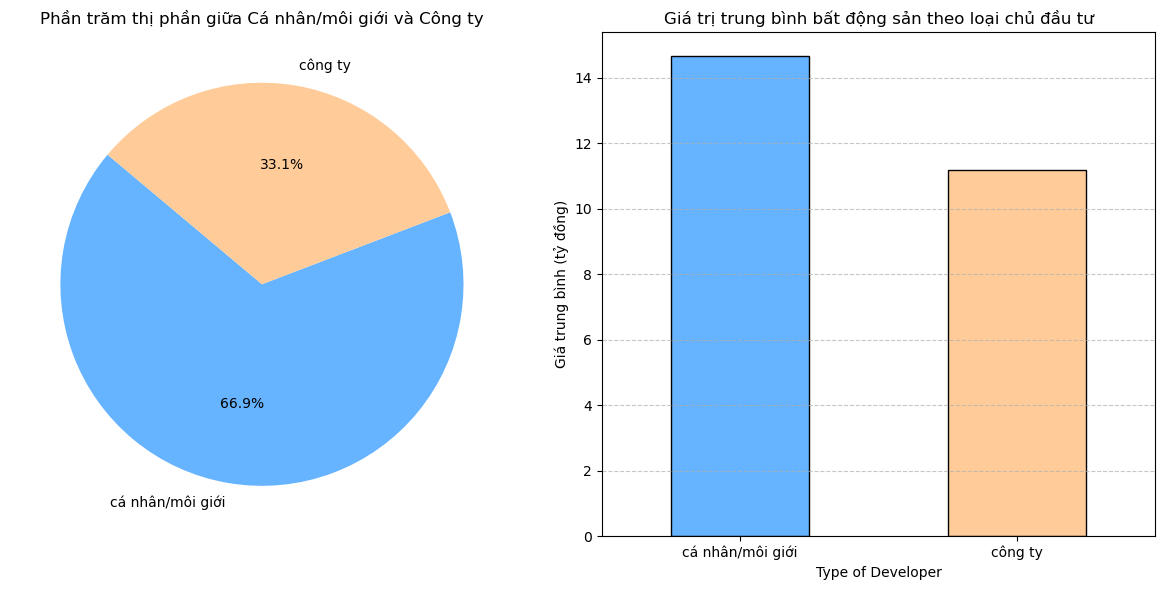

In [48]:
# Vẽ hai biểu đồ (thị phần và giá trị trung bình) 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ tròn thị phần (biểu đồ 1)
axes[0].pie(
    market_share, 
    labels=market_share.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#66b3ff", "#ffcc99"]
)
axes[0].set_title("Phần trăm thị phần giữa Cá nhân/môi giới và Công ty")

# Biểu đồ cột giá trị trung bình (biểu đồ 2)
avg_price.plot(
    kind="bar", 
    color=["#66b3ff", "#ffcc99"], 
    edgecolor="black", 
    ax=axes[1]
)
axes[1].set_title("Giá trị trung bình bất động sản theo loại chủ đầu tư")
axes[1].set_ylabel("Giá trung bình (tỷ đồng)")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_xticklabels(avg_price.index, rotation=0)

plt.tight_layout()
plt.show()


**Nhận xét:**
- Dữ liệu thống kê được phần lớn các bất động sản được rao bán là thuộc quản lý tư nhân hoặc môi giới:
    - Điều này không đồng nghĩa với việc số lượng bất động sản thực tế trên thị trường chiếm số đông ở cá nhân và môi giới, vì các công ty/tập đoàn bất động sản lớn thường rao bán trên nhiều kênh khác nhau mà chủ yếu là trên trang web chính thức của họ, do đó số liệu trên sàn tập trung này sẽ không nhiều bằng cá nhân và môi giới hay nói cách khác các sàn bất động sản tập trung không phải là kênh chính của các tập đoàn lớn
    - Đồng nghĩa với việc các sàn online tập trung như batdongsan.com là kênh chính của các nhà bất động sản "cá nhân/môi giới"

- Giá trị trung bình của các động sản cá nhân cao hơn rất nhiều (gần gấp đôi) so với các bất động sản thuộc diện công ty/tập đoàn bất động sản.
    - Các công ty/tập đoàn bất động sản thường hướng tới việc phục vụ cho nhu cầu số đông của các cá nhân nhân trên thị trường, do đó các bất động sản của họ thưòng có mức giá được cho là dễ tiếp cận hơn cho toàn thể dân cư so với các bất động sản cá nhân.
    - Các cá nhân/môi giới có giá trị trung bình của các bất động sản cao hơn có thể do sự cấu thành của nhiều lý do:
        - Khác với các bất động sản công ty/tập đoàn thường cố định theo mức giá đã được đề ra, các bất động sản cá nhân thường phải thông qua thương lượng để chốt được mức giá hợp lý, do đó các cá nhân thường đẩy giá cao hơn so với mức giá trị chính xác của BDS dẫn tới mức giá trung bình trên sàn thương mại cao hơn.
        - Các biệt thự các mức giá trị cao thường được rao bán dưới dạng cá nhân/môi giới, do đó nó cũng góp phần làm tăng mức giá trung bình của nhóm BDS này.

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

##### **Biểu đồ phân bổ BDS theo các công ty BDS**

In [49]:
def handle_name_of_developers(value):
    try:
        # Thay thế "Công ty" thành "CT" và "Cổ phần" thành "CP"
        value = value.replace("công ty", "CT").replace("cổ phần", "CP")
        return value
    except:
        return value


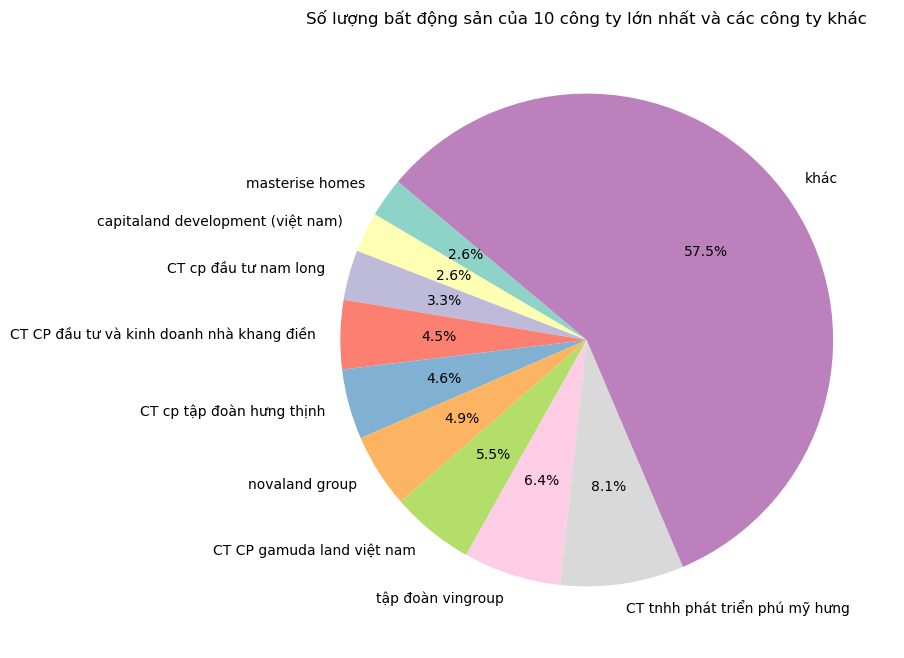

In [50]:

# 3. Phân tích các công ty
company_data = df[df["Type of Developer"] == "công ty"].copy()

company_data["Developer"] = company_data["Developer"].apply(handle_name_of_developers)

# Chuyển các chủ đầu tư có tên "đang cập nhật" vào nhóm "Khác"
company_data.loc[company_data["Developer"] == "đang cập nhật", "Developer"] = "khác"

# Đếm số lượng bất động sản của từng công ty sau khi xử lý
top_companies_updated = company_data["Developer"].value_counts()

# Đếm số lượng chủ đầu tư duy nhất
num_developers = company_data["Developer"].nunique()

# Tách 10 công ty lớn nhất (sau khi xử lý) và gộp các công ty khác
top_10_updated = top_companies_updated[:10]
others_updated = top_companies_updated[10:].sum()
top_10_updated["khác"] += others_updated

# Sắp xếp lại dữ liệu trước khi vẽ
top_10_updated = top_10_updated.sort_values(ascending=True)

# Vẽ lại biểu đồ tròn sau khi xử lý
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_updated, 
    labels=top_10_updated.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("Set3")
)

plt.title("Số lượng bất động sản của 10 công ty lớn nhất và các công ty khác")
plt.show()

In [51]:
numer_of_deverlopers = company_data["Developer"].nunique()
print (f"Số lượng các công ty/tập đoàn BDS: {numer_of_deverlopers}")

Số lượng các công ty/tập đoàn BDS: 199


**Nhận xét:**
- Dựa vào dữ liệu ta thấy rằng thị phần BDS không phân tán tập trung vào các tập đoàn lớn mà phân tán rộng khắp cho các công ty và tập đoàn
    - Có đến 199 công ty/tập đoàn BDS khác nhau trong tập dữ liệu thu thập được
    - Có hơn 57% các bất động sản thuộc các công ty/tập đoàn vừa và nhỏ
- Trong các công ty/tập đoàn BDS lớn thì Phú Mỹ Hưng, Gamuda Land, VinGroup, Novaland Group và Tập Đoàn Hưng Thịnh là các tập đoàn lớn thâu tóm số lượng lớn các bất động sản (chiếm khoảng 25% thị phần các bất động sản công ty/tập đoàn)
    - Phú Mỹ Hưng là công ty top 1 với 8.1% thị phần
    - VinGroup và Gamuda Land lần lượt chiếm vị trí thứ 2 và 3 với chỉ số 6.6% và 5.5%
    - Novaland Group và Tập Đoàn Hưng Thịnh đang mất dần thị phần qua nhiều biến cố với 4.9% và 4.6% lần lượt đứng thứ 4 và 5 


*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

### **2. Trả lời các câu hỏi có ý nghĩa**

#### **a. Các quận nào có diện tích nhà trung bình lớn nhất nhưng giá trung bình lại thấp?**

**Chuẩn bị dữ liệu**

In [52]:
# Tính diện tích trung bình và giá trung bình theo từng quận
avg_area_price_by_district = df.groupby("District").agg(
    Mean_Area=("Area", "mean"),
    Mean_Price=("Price", "mean")
).reset_index()

# Tính giá trị trung bình của toàn thành phố để làm ngưỡng so sánh
mean_price_city = avg_area_price_by_district["Mean_Price"].mean()

# Lọc các quận có giá trung bình thấp hơn mức trung bình của thành phố
low_price_wards = avg_area_price_by_district[avg_area_price_by_district["Mean_Price"] < mean_price_city]

# Sắp xếp theo diện tích trung bình giảm dần
result = low_price_wards.sort_values("Mean_Area", ascending=False)

**Trực quan hóa**

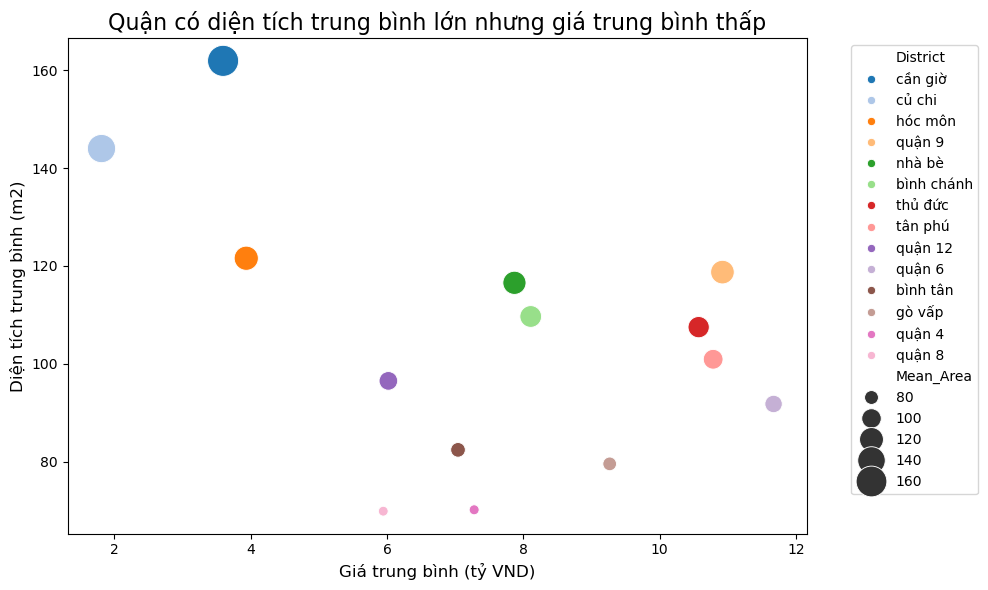

In [53]:
# Vẽ biểu đồ minh họa
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=result, x="Mean_Price", y="Mean_Area", hue="District", size="Mean_Area", sizes=(50, 500), palette="tab20", ax=ax)
ax.set_title('Quận có diện tích trung bình lớn nhưng giá trung bình thấp', fontsize=16)
ax.set_xlabel('Giá trung bình (tỷ VND)', fontsize=12)
ax.set_ylabel('Diện tích trung bình (m2)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét:** (Chỉ xét các quận có giá trung bình thấp hơn mức trung bình của thành phố HCM)
- Xét về diện tích trung bình, ta thấy các quận như: Cần Giờ, Củ Chi, Hóc Môn, Quận 9, Nhà bè, Bình Chánh, Thủ Đức là những quận có diện tích trung bình lớn nhất

    - Trong khi đó các quận như: Quận 8, 4, Gò Vấp là các quận có diện tích trung bình thấp nhất

- Xét về giá trung bình thì ta thấy các quận như: Cần Giờ, Củ Chi Hóc Môn, quận 8, quận 12.. là các quận có giá trị trung bình là thấp nhất

    - Trong khi đó các quận như: quận 9, quận 6, Thủ Đức là các quận có mức giá trung bình cao nhất.



##### **Kết luận**


- Cần Giờ, Củ Chi, Hóc Môn là các quận có diện tích trung bình là lớn nhất nhưng giá trung bình lại là thấp nhất trong các quận có mức giá thấp hơn mức giá trung bình của thành phố.

#### **b. Nhà phát triển nào đưa ra bất động sản đắt nhất ?**

**Chuẩn bị dữ liệu**

In [54]:
# Tính giá trung bình của bất động sản theo từng nhà phát triển
avg_price_by_developer = df.groupby("Developer")["Price"].mean().reset_index()

# Sắp xếp theo giá trung bình giảm dần và lấy top 10
top_10_developers = avg_price_by_developer.sort_values(by="Price", ascending=False).head(10)

# Tìm nhà phát triển có giá trung bình cao nhất
max_price_developer = avg_price_by_developer.loc[avg_price_by_developer["Price"].idxmax()]

**Trực quan hóa**

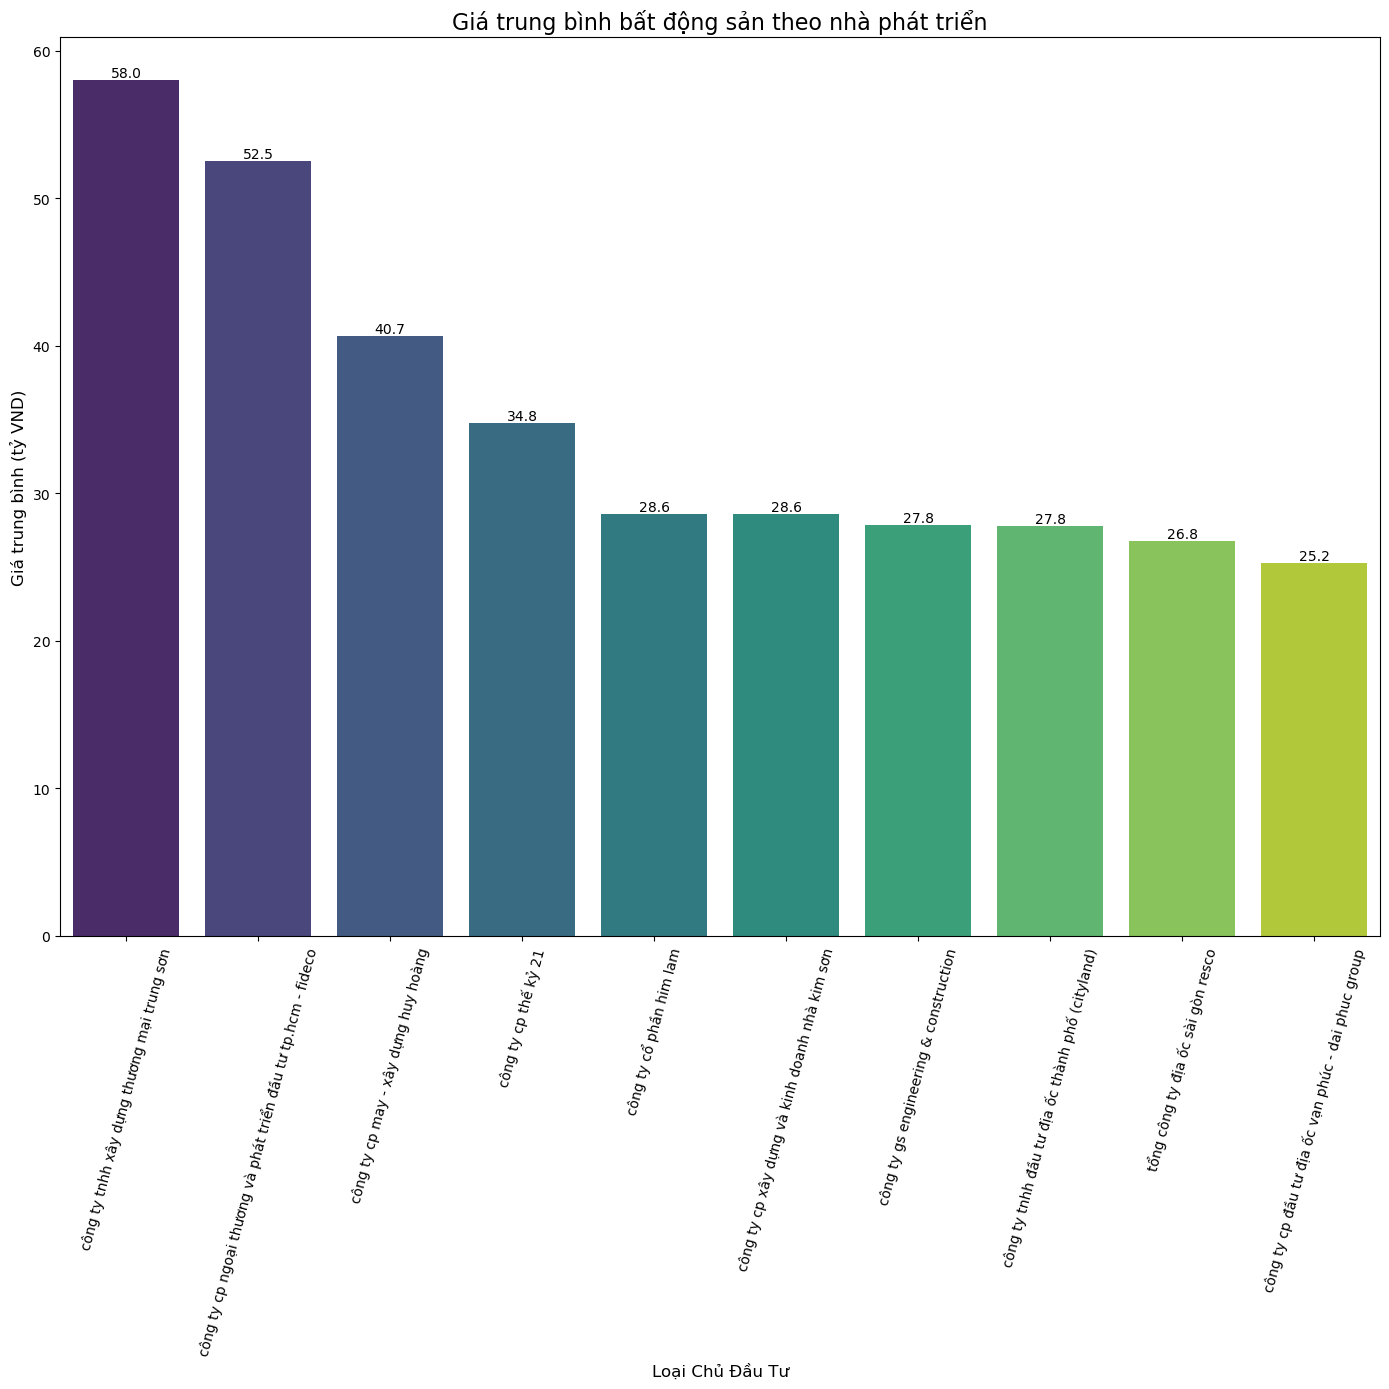

In [55]:
# Vẽ biểu đồ minh họa
fig, ax = plt.subplots(figsize=(14, 14))
sns.barplot(data=top_10_developers, x="Developer", y="Price", hue="Developer", palette="viridis", ax=ax, dodge=False)

# Làm nổi bật nhà phát triển có giá cao nhất
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)
ax.set_title('Giá trung bình bất động sản theo nhà phát triển', fontsize=16)
ax.set_xlabel('Loại Chủ Đầu Tư', fontsize=12)
ax.set_ylabel('Giá trung bình (tỷ VND)', fontsize=12)

plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

**Nhận xét**:
- Về tổng quan, Cty TNHH Xây Dụng Thương Mại Trung Sơn và Cty CP Ngoại Thương và Phát Triển Đầu Tư Tp.HCM - fideco là 2 công ty có mức giá trung bình cao nhất, theo sau là các công ty như: Cty CP May - Xây Dựng Huy Hoàng, Cty CP Thế Kỷ 21, Cty CP HimLam, ....

- Có thể thấy các công ty sở hữu các bất động sản có giá trị cao trên sàn điện tử không có mặt các tên quen thuộc như Vinhome, Novaland hay Phú Mỹ Hưng. Điều này có thể cho thấy rằng
    -  Các công ty top đầu đang khai thác một phân khúc khác, không phải phân khúc cao cấp.
    -  Hoặc sàn thương mại điện tử không phải là kênh chính mà họ đang khai thác để rao bán bất động sản.

##### **Kết luận**

- Nhà phát triển có bất động sản đắt nhất: công ty tnhh xây dụng thương mại trung sơn với giá trung bình 58.0 tỷ VND

#### **c. Có sự chênh lệch giữa giá thực tế và giá đề xuất của chính phủ hay không?**

**Chuẩn bị dữ liệu**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9327 entries, 0 to 9326
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Price              9327 non-null   float64 
 1   Area               9327 non-null   float64 
 2   Bedrooms           9327 non-null   int64   
 3   Toilets            9327 non-null   int64   
 4   Published At       9327 non-null   object  
 5   Developer          9327 non-null   object  
 6   Street             9327 non-null   object  
 7   District           9327 non-null   object  
 8   Suggested Price    9327 non-null   float64 
 9   Million/m2         9327 non-null   float64 
 10  District Price     9327 non-null   float64 
 11  Street Price       9327 non-null   float64 
 12  Region             9327 non-null   object  
 13  Price Range        9327 non-null   category
 14  Type of Developer  9327 non-null   object  
dtypes: category(1), float64(6), int64(2), object(6)
memory 

In [57]:
# Tính toán sự chênh lệch giữa Giá Bán và Giá Đề Xuất (Triệu/m2)
df['Price Gap'] = df['Million/m2'] - df['Suggested Price']

# Tính giá trị trung bình của sự chênh lệch theo quận
avg_difference_by_district = df.groupby("District")["Price Gap"].mean().reset_index()

# Sắp xếp sự chênh lệch theo quận
avg_difference_by_district = avg_difference_by_district.sort_values("Price Gap", ascending=False)

**Trực quan hóa**

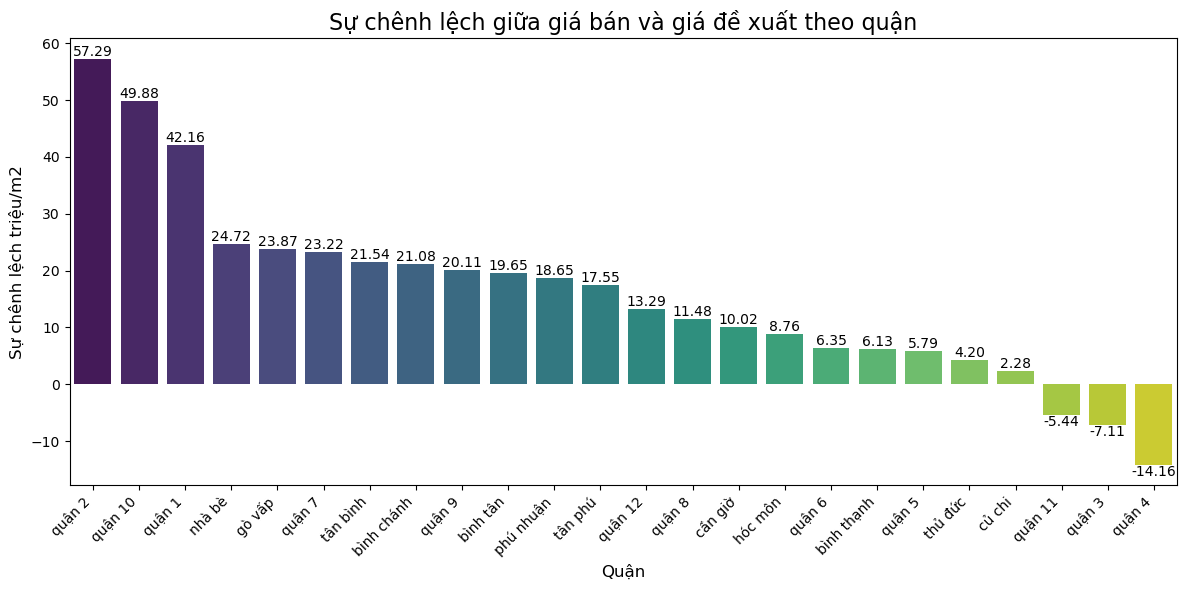

In [65]:
# Vẽ biểu đồ sự chênh lệch giữa giá và giá đề xuất
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=avg_difference_by_district, x="District", y="Price Gap", hue="District", palette="viridis", ax=ax)

# Thêm nhãn giá trị trên các cột
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

# Thiết lập tiêu đề và nhãn
ax.set_title('Sự chênh lệch giữa giá bán và giá đề xuất theo quận', fontsize=16)
ax.set_xlabel('Quận', fontsize=12)
ax.set_ylabel('Sự chênh lệch triệu/m2', fontsize=12)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Nhận xét:**

- Tổng quan là có sự chệnh lệch giữa giá bán thực tế và giá đề xuất của chính phủ (hầu hết là cao hơn so với mức đề xuất), cụ thể:

    - Quận 2, 10, 1 là các quận có sự chênh lệch cao nhất so với giá đề xuất (điều này đúng với thực tế vì đây là những khu vực giá vàng, giá đất tăng theo từng ngày).

    - Quận Củ Chi, Thủ Đức, quận 11 là các quận có giá thực tế gần với giá đề xuất nhất (cho thấy các quận này có mức giá BDS ổn định)

    - Có một số trưòng hợp đặc biệt có mức giá đề xuất cao hơn mức giá thực tế như: quận 11, quận 4 và quận 3.

##### **Kết luận**:

- Giá thực tế và giá đề xuất hầu hết là chênh lệnh với nhau

- Trong hầu hết các trường hợp giá thực tế là cao hơn so với giá đề xuất từ 2,28 triệu/m2 đến 57,3 triệu/m2

- Có một số trường hợp đặc biệt , giá đề xuất cao hơn giá thực tế, nhưng số trường hợp này rất ít

#### **d. Số lượng bài đăng của bất động sản trên khu vực có mối liên hệ gì với giá cả?**

**Chuẩn bị dữ liệu**

In [59]:
# Tính tần suất bài đăng theo khu vực
post_frequency = df["District"].value_counts().reset_index()
post_frequency.columns = ["Quận", "Số lượng bài đăng"]

# Tính giá trung bình theo khu vực
avg_price_by_area = df.groupby("District")["Price"].mean().reset_index()
avg_price_by_area.columns = ["Quận", "Giá trung bình"]

# Kết hợp dữ liệu
merged_data = pd.merge(post_frequency, avg_price_by_area, on="Quận")

**Trực quan hóa**

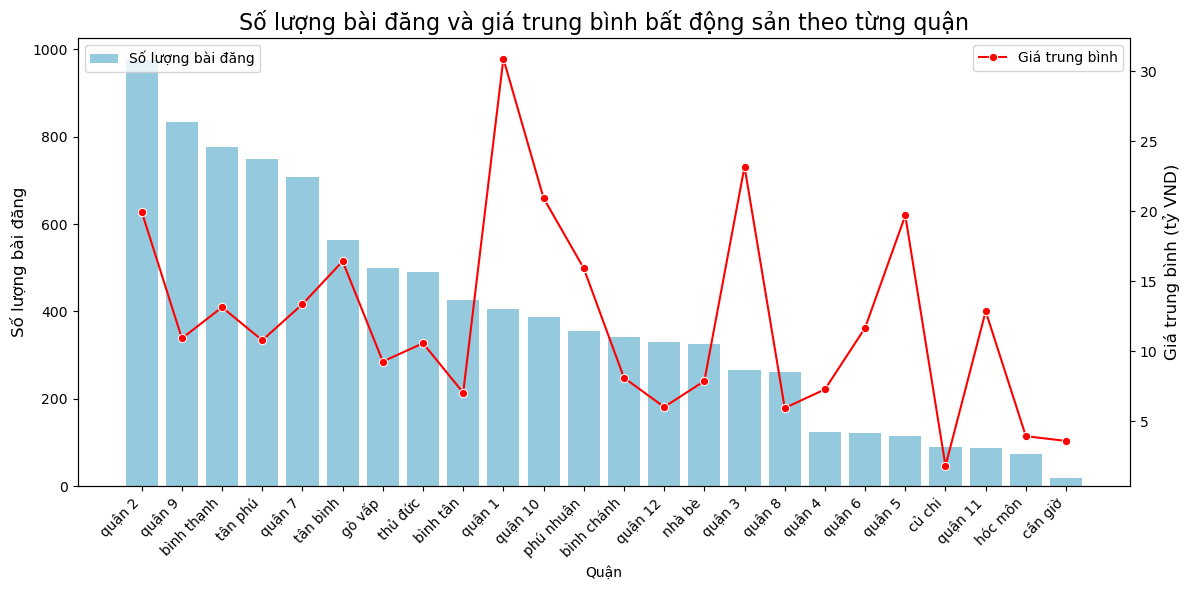

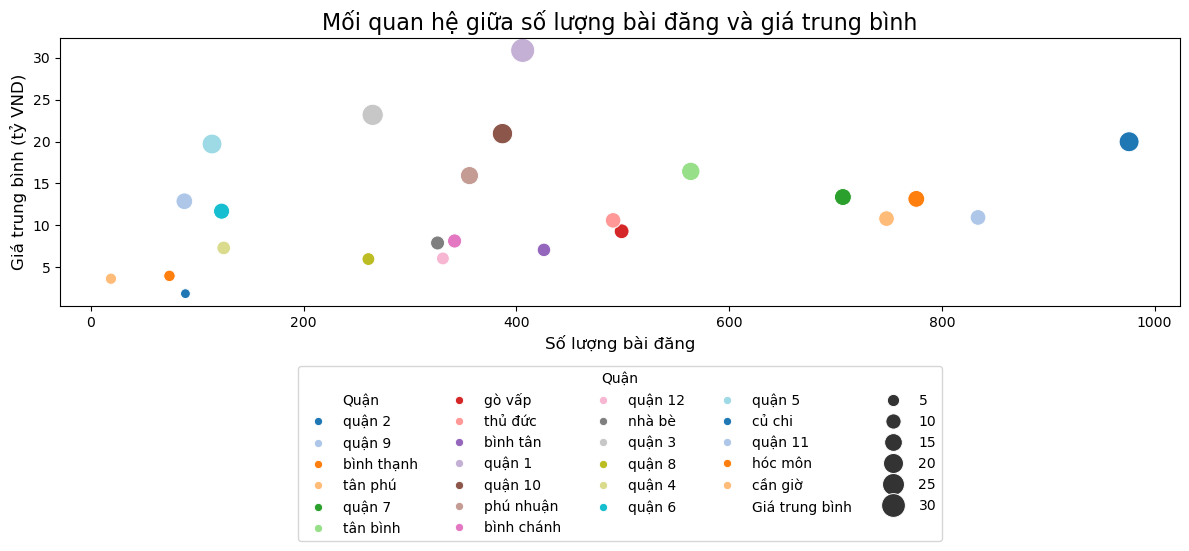

In [60]:
# Vẽ biểu đồ cột đôi
fig, ax1 = plt.subplots(figsize=(12, 6))

# Biểu đồ cột cho Số lượng bài đăng
sns.barplot(data=merged_data, x="Quận", y="Số lượng bài đăng", ax=ax1, color="skyblue", label="Số lượng bài đăng")
ax1.set_ylabel("Số lượng bài đăng", fontsize=12)
ax1.set_title("Số lượng bài đăng và giá trung bình bất động sản theo từng quận", fontsize=16)

# Thêm trục y phụ cho giá trung bình
ax2 = ax1.twinx()
sns.lineplot(data=merged_data, x="Quận", y="Giá trung bình", ax=ax2, color="red", label="Giá trung bình", marker="o")
ax2.set_ylabel("Giá trung bình (tỷ VND)", fontsize=12)

# Thêm chú thích
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Biểu đồ phân tán
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="Số lượng bài đăng", y="Giá trung bình", hue="Quận", size="Giá trung bình", sizes=(50, 300), palette="tab20", ax=ax)
ax.set_title("Mối quan hệ giữa số lượng bài đăng và giá trung bình", fontsize=16)
ax.set_xlabel("Số lượng bài đăng", fontsize=12)
ax.set_ylabel("Giá trung bình (tỷ VND)", fontsize=12)

ax.legend(
    bbox_to_anchor=(0.5, -0.2), 
    loc='upper center',          
    ncol=5,                      
    title="Quận",                
    fontsize=10                  
)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Nhìn chung số lượng bài đăng ở các quận như quận 2, quận 9, Bình Thạnh, Tân Phú, quận 7 là các quận có số lượng bài đăng cao nhất
    - Trong khi đó các quận như Củ Chi, quận 11, Hóc Môn, Cần Giờ là các quận có số lượng bài đăng thấp nhất

- Mặc khác các quận như quận 1, quận 2, quận 3, quận 5 là các quận có giá trung bình cao nhất
    - Còn các quận như: Hóc Môn, Cân Giờ, Củ Chi, quận 8 là các quận có giá trung bình thấp nhất


##### **Kết luận:**
- Nhìn tổng thế, số lượng bài đăng và giá trung bình theo các quận có một sự liên quan với nhau, cụ thể như quận 2 có tần suất bài đăng cao và giá trung bình cũng cao, ngược lại, Cần Giờ, Củ Chi, Hóc Môn có giá trung bình thấp và số lượng bài đăng cũng thấp theo. 

- Nhưng sự liên hệ này chỉ ở mức trung bình, vì có những quận như quận 5, quận 3 mặc dù giá trung bình khá cao nhưng tần suất bài đăng thì rất thấp, hay Bình Tân, Gò Vấp, Thủ Đức có mức giá trung bình thấp nhưng tần suất bài đăng cũng khá cao.

#### **e. Số lượng phòng cao hơn có đồng nghĩa với việc bất động sản có giá cao hơn không?**

**Chuẩn bị dữ liệu**

In [61]:
# Các khoảng số phòng
bins = [0, 1, 2, 3, 4, 5, 6, 7 , 8 , 9 , 10, float('inf')]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '10+']

# Thêm cột 'Khoảng số phòng' vào DataFrame
df['Khoảng số phòng'] = pd.cut(df['Bedrooms'], bins=bins, labels=labels, include_lowest=True)

# Tính giá trung bình của mỗi khoảng số phòng
room_avg_price = df.groupby('Khoảng số phòng', observed=False)['Price'].mean().reset_index()
room_avg_price.columns = ['Khoảng số phòng', 'Giá trung bình']


**Trực quan hóa**

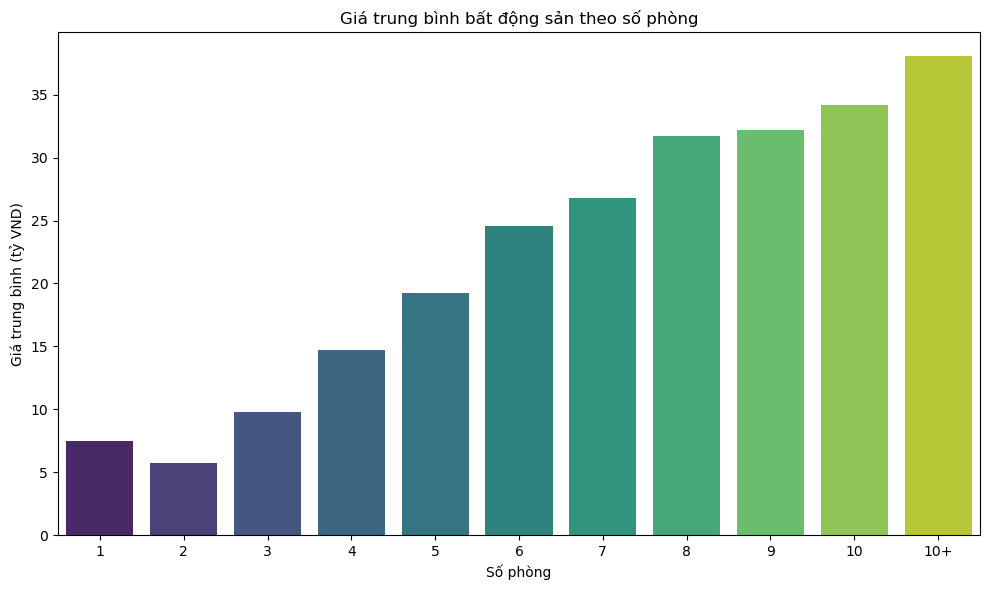

In [62]:
# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=room_avg_price, x='Khoảng số phòng', y='Giá trung bình',hue="Khoảng số phòng", palette='viridis')
plt.title('Giá trung bình bất động sản theo số phòng')
plt.xlabel('Số phòng')
plt.ylabel('Giá trung bình (tỷ VND)')
plt.tight_layout()
plt.show()

**Nhận xét:**

- Biểu đồ cho thấy một xu hướng chung rằng số lượng phòng càng cao thì giá trung bình cũng cao
- Có một ngoại lệ duy nhất rằng số phòng 1 lại có giá trung bình cao hơn số phòng 2

##### **Kết luận:**
- Số phòng cao hơn tương đồng với việc giá nhà cao hơn
- Số lượng phòng bằng 1 lại có giá cao hơn số lượng phòng bằng 2 điều này có thể giải thích rằng một số căn hộ cao cấp với các vị trí đắc địa thường chỉ có 1 phòng (vì vị trí đắc địa thì diện tích không cao sẽ không có diện tích để xây nhiều phòng) do đó nó có giá trung bình cao hơn loại nhà có 2 phòng.

#### **f. Cần bao nhiêu tiền để sở hữu bất động sản tại thành phố Hồ Chí Minh?**

**Chuẩn bị dữ liệu**

In [63]:
# Tính giá trị trung bình của Giá theo quận
avg_price_by_district = df.groupby("District")["Price"].mean().reset_index()

# Sắp xếp giá trị trung bình của Giá theo quận giảm dần
avg_price_by_district = avg_price_by_district.sort_values("Price", ascending=False)

# Tính giá trị trung bình của cột "Triệu/m2" theo từng quận
avg_price_per_m2_by_district = df.groupby("District")["Million/m2"].mean().reset_index()

# Sắp xếp giá trị trung bình của Triệu/m2 theo quận giảm dần
avg_price_per_m2_by_district = avg_price_per_m2_by_district.sort_values("Million/m2", ascending=False)

**Trực quan hóa**

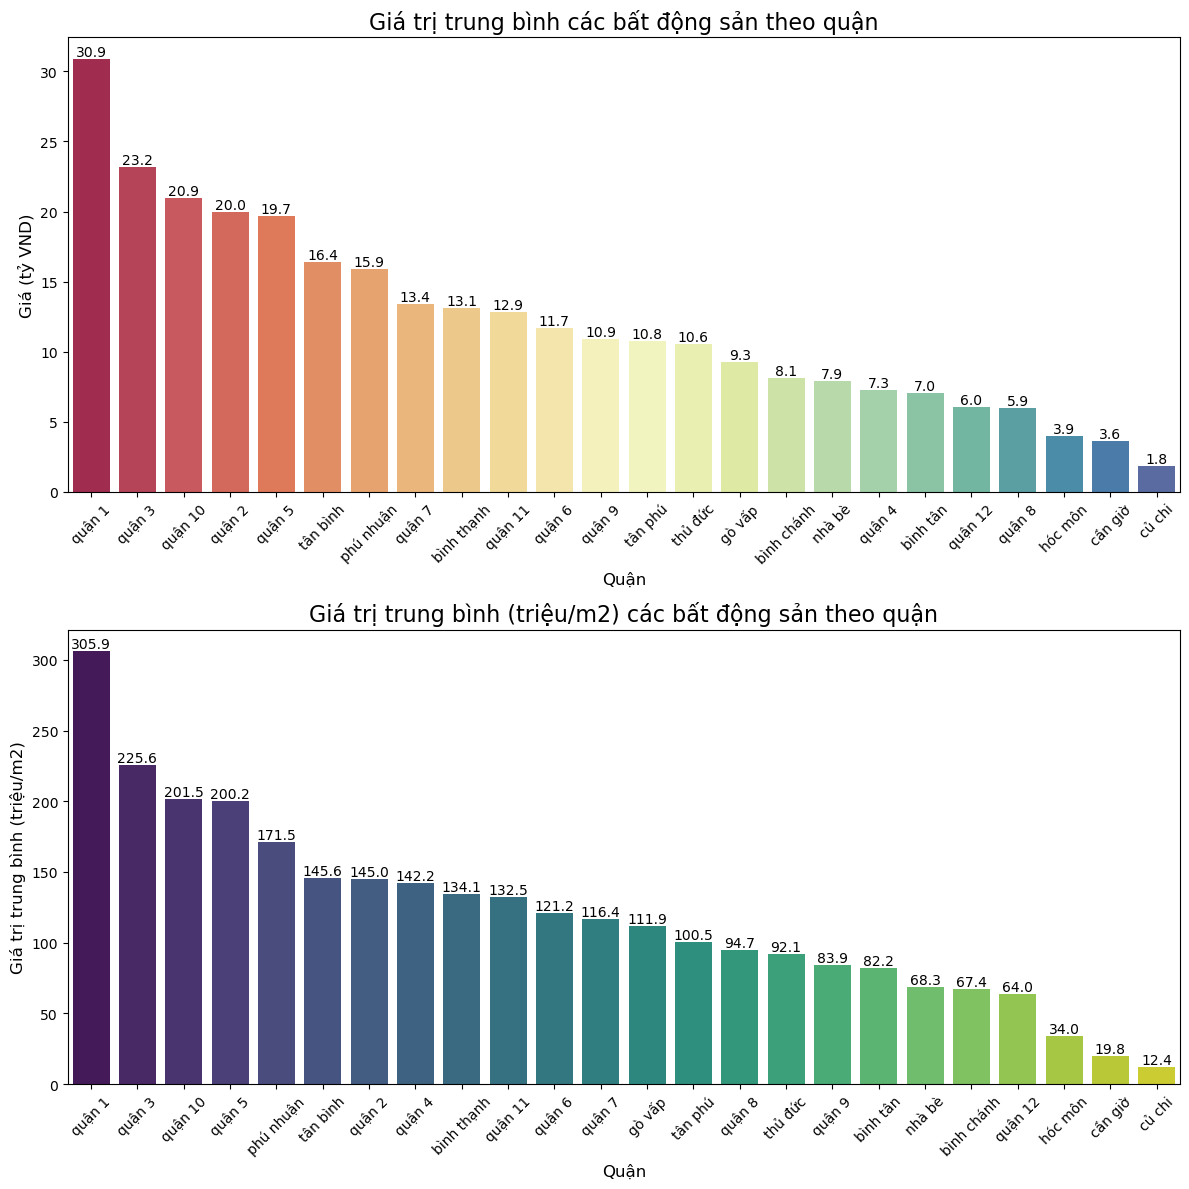

In [64]:
# Tạo một frame với 2 biểu đồ (1 trên, 1 dưới)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # 2 hàng, 1 cột

# Vẽ biểu đồ cột cho "Giá" trong subplot đầu tiên
sns.barplot(data=avg_price_by_district, x="District", y="Price", ax=ax[0], palette="Spectral", hue="District", legend=False)
ax[0].set_title('Giá trị trung bình các bất động sản theo quận', fontsize=16)
ax[0].set_xlabel('Quận', fontsize=12)
ax[0].set_ylabel('Giá (tỷ VND)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

# Ghi giá trị lên các cột ở biểu đồ đầu tiên
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)

# Vẽ biểu đồ cột cho "Triệu/m2" trong subplot thứ hai
sns.barplot(data=avg_price_per_m2_by_district, x="District", y="Million/m2", ax=ax[1], palette="viridis", hue="District", legend=False)
ax[1].set_title('Giá trị trung bình (triệu/m2) các bất động sản theo quận', fontsize=16)
ax[1].set_xlabel('Quận', fontsize=12)
ax[1].set_ylabel('Giá trị trung bình (triệu/m2)', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

# Ghi giá trị lên các cột ở biểu đồ thứ hai
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()

**Nhận xét:**

- **1. Mức giá trung bình (tính theo tổng giá trị):**
    - Quận 3 và Quận 1 là hai quận có giá trung bình cao nhất, lần lượt là 30.9 tỷ và 23.2 tỷ.
    - Các khu vực có giá trung bình thấp nhất là Cần Giờ (3.6 tỷ), Củ Chi (1.8 tỷ), và Hóc Môn (3.9 tỷ).
    - Như vậy, để sở hữu một bất động sản tại TP.HCM, bạn cần trung bình từ 1.8 tỷ đến gần 30.9 tỷ, tùy thuộc vào quận.
- **2. Mức giá trung bình (tính theo triệu/m²):**
    - Quận 1 có mức giá trên mỗi mét vuông cao nhất: 305.9 triệu/m², gần gấp đôi nhiều khu vực khác.
    - Các quận như Quận 3 (225.6 triệu/m²) và Quận 10 (201.5 triệu/m²) cũng nằm trong nhóm đắt đỏ.
    - Các khu vực xa trung tâm như Cần Giờ (19.8 triệu/m²) và Củ Chi (12.4 triệu/m²) có giá rẻ hơn nhiều.
    - Vì vậy, bạn cần chuẩn bị từ 10 triệu đến gần 300 triệu/m², tùy thuộc vào vị trí bất động sản.
- **3. Nhận xét tổng quan:**
    - Khu vực trung tâm (Quận 1, Quận 3): Cần ngân sách cao, với mức giá bất động sản trung bình từ 20-30 tỷ và giá đất trung bình từ 200 - 300 triệu/m².
    - Khu vực cận trung tâm (Bình Thạnh, Quận 2, Quận 10): Cần ngân sách từ 13-20 tỷ, với mức giá đất dao động từ 130-200 triệu/m².
    - Khu vực ngoại thành (Củ Chi, Cần Giờ): Đây là những lựa chọn phù hợp với ngân sách thấp hơn, từ 2-10 tỷ, và giá đất chỉ khoảng 10-20 triệu/m².
- **4. Câu trả lời tổng hợp:**
    - Ngân sách tối thiểu: Khoảng 2 tỷ đồng cho một bất động sản tại các quận ngoại thành như Cần Giờ hoặc Củ Chi.
    - Ngân sách trung bình cho khu vực trung tâm: Từ 15 tỷ đồng trở lên (hoặc hơn nếu là bất động sản lớn tại Quận 1, Quận 3).
    - Mức giá trung bình đất: Khoảng 150-300 triệu/m² cho trung tâm, và dưới 50 triệu/m² cho các khu vực xa trung tâm.
    - Nếu bạn là một người có tài chính không quá dư giả nhưng muốn ở một quận trung tâm, hãy lựa chọn quận 4 khi chỉ cách Quận 1 một cái cầu và giá trung bình chỉ từ 7.3 tỷ cho một bất động sản.

##### **Kết luận**

- Khu vực trung tâm (Quận 1, Quận 3): Nếu bạn có ngân sách cao và muốn sở hữu bất động sản ở khu vực sầm uất và đắt đỏ, bạn cần chuẩn bị từ 20 tỷ đến 30 tỷ đồng. Mức giá đất trung bình ở các khu vực này dao động từ 200 triệu/m² đến 300 triệu/m².

- Khu vực cận trung tâm (Quận 2, Bình Thạnh, Quận 10): Nếu ngân sách của bạn thấp hơn, các quận này có thể là lựa chọn tốt với mức giá từ 13 tỷ đến 20 tỷ đồng. Giá đất ở đây dao động từ 130 triệu/m² đến 200 triệu/m².

- Khu vực ngoại thành (Củ Chi, Cần Giờ): Nếu ngân sách hạn chế, bạn có thể xem xét các khu vực ngoại thành với ngân sách từ 2 tỷ đến 10 tỷ đồng. Các khu vực này có mức giá đất rẻ hơn nhiều, từ 10 triệu/m² đến 20 triệu/m².

- Nếu bạn không có ngân sách quá lớn nhưng vẫn muốn sống gần trung tâm, có thể cân nhắc các quận như Quận 4. Với mức giá chỉ từ 7.3 tỷ đồng cho một bất động sản, Quận 4 là lựa chọn hợp lý, khi nó chỉ cách Quận 1 một cây cầu. 
